In [2]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv('../data/qpairs_dev.csv', keep_default_na=False, dtype={'question1': str, 'question2': str}) \
             .set_index('id')
print(len(raw_data))
# raw_data = raw_data.dropna()
print(len(raw_data))
#the result is 404348, kind of different from the 404358 reported here
#https://www.kaggle.com/rahulvks/data-clustering-and-data-visualization#

print(raw_data.isnull().sum())

323480
323480
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64


In [2]:
pd.set_option('display.max_colwidth', -1)
raw_data.head()

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0
5,11,12,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",1


In [3]:
print(raw_data.is_duplicate.value_counts())
neg_cnts = len(raw_data[raw_data['is_duplicate'] == 0])
pos_cnts = len(raw_data[raw_data['is_duplicate'] == 1])
base_acc = max(pos_cnts, neg_cnts) / len(raw_data)
print('base_acc:{}'.format(base_acc))

0    203945
1    119535
Name: is_duplicate, dtype: int64
base_acc:0.6304717447755657


In [4]:
def split_train_dev_test(raw_data):
    raw_data = raw_data['question1', 'question2', 'isduplicate']
    train_size = int(0.8 * len(raw_data))
    dev_size = int(0.1 * len(raw_data))
    test_size = int(0.1 * len(raw_data))
    train_data = raw_data[:train_size]
    dev_data = raw_data[train_size : train_size + dev_size]
    test_data = raw_data[train_size + dev_size : ]
    return train_data

print(raw_data.question1[0])
print(raw_data.question2[0])
print(raw_data.is_duplicate[0])


print(raw_data.question1[2])
print(raw_data.question2[2])
print(raw_data.is_duplicate[2])

print(raw_data.question1[5])
print(raw_data.question2[5])
print(raw_data.is_duplicate[5])

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?
0


KeyError: 2

In [3]:
from functools import reduce, partial
from multiprocessing import cpu_count, Pool

def df_apply_multi_process(df):
    """pd.DateFrame().apply() using multi-processing."""
    splits = np.array_split(df, cpu_count())
    with Pool(cpu_count()) as pool:
        return pd.concat(pool.map(_apply_one_split, splits)) 

In [6]:
from nltk import word_tokenize

In [19]:
from nltk.corpus import stopwords
# stopwords: pronoun, wh-words. Maybe we should not remove these words


stemmer = nltk.stem.SnowballStemmer('english')
lemmatizer = nltk.wordnet.WordNetLemmatizer()

"""
list1 = raw_data.question1.values
for q in raw_data.question1.values:
    try:
        word_tokenize(q)
    except:
        print(q)
        break
"""

# tokenization is too slow, has to be parallelized

def _apply_one_split(s):
    return s.apply(lambda r: word_tokenize(r['question1'].lower()), axis=1)

raw_data['q1_tokens'] = df_apply_multi_process(raw_data)


def _apply_one_split(s):
    return s.apply(lambda r: word_tokenize(r['question2'].lower()), axis=1)

raw_data['q2_tokens'] = df_apply_multi_process(raw_data)

In [20]:
raw_data.head()

,qid1,qid2,question1,question2,is_duplicate,q1_tokens,q2_tokens
id,,,,,,,
0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,"[what, is, the, step, by, step, guide, to, invest, in, share, market, in, india, ?]","[what, is, the, step, by, step, guide, to, invest, in, share, market, ?]"
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,"[what, is, the, story, of, kohinoor, (, koh-i-noor, ), diamond, ?]","[what, would, happen, if, the, indian, government, stole, the, kohinoor, (, koh-i-noor, ), diamond, back, ?]"
3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,"[why, am, i, mentally, very, lonely, ?, how, can, i, solve, it, ?]","[find, the, remainder, when, [, math, ], 23^, {, 24, }, [, /math, ], is, divided, by, 24,23, ?]"
4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,"[which, one, dissolve, in, water, quikly, sugar, ,, salt, ,, methane, and, carbon, di, oxide, ?]","[which, fish, would, survive, in, salt, water, ?]"
5,11,12,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",1,"[astrology, :, i, am, a, capricorn, sun, cap, moon, and, cap, rising, ..., what, does, that, say, about, me, ?]","[i, 'm, a, triple, capricorn, (, sun, ,, moon, and, ascendant, in, capricorn, ), what, does, this, say, about, me, ?]"


In [4]:
import re

m = re.search('\[math\].+\[\/math\]', 'aa')

In [42]:
contain_math_mask = raw_data.apply(lambda r: re.search('\[math\].+\[\/math\]', r['question1']) is not None or
                              re.search('\[math\].+\[\/math\]', r['question2']) is not None, axis=1)

In [46]:
# number of qpairs that contain formulas
print(raw_data.loc[contain_math_mask].shape[0])
print(raw_data.loc[contain_math_mask].shape[0] / raw_data.shape[0])

563
0.0017404476320019785


In [49]:
raw_data.loc[contain_math_mask][['question1', 'question2', 'is_duplicate']]

,question1,question2,is_duplicate
id,,,
3,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
362,How do I find the zeros of the polynomial function [math]f(x)=\dfrac{1}{2}x^{3}-3x[/math]?,How would you find the zero of the function for [math]y=\frac{4x^2 - 36x}{ x-9}[/math]?,0
1658,What is the formula of [math](a+b)^3[/math]?,How can I be great at math?,0
1923,"Given that alpha and beta are roots of the equation 3x^2-5=0 form the equation whose roots are 2alpha-1/beta, 2alpha-/alpha?","The roots of the equation [math]x^2+3x-10=0[/math] are [math]\alpha[/math] and [math]\beta[/math], where [math]\alpha<\beta[/math]. What equation are [math]\alpha-1[/math] and [math]\beta+2[/math] the roots of?",0
2436,Why do not photons obey E = m c ^ 2?,How can photons have no mass and yet still have energy given that [math]E=mc^2[/math]?,0
2711,What is [math]\sqrt {2+\sqrt {2+\sqrt {2+\sqrt {2+...\infty}}}}[/math] ?,If [math]y=f(x)=\sqrt{x+\sqrt{x^2+\sqrt{x+\sqrt{x^2+\sqrt{...\infty}}}}}[/math] and [math]\int f'(x)dy=g(y)+c[/math]. Then what is [math]g[/math]?,0
3761,How do I solve [math]\frac{1}{4} x + x = - 3 + \frac{1}{2} x[/math]?,How can I solve [math]\frac 1 x + \frac{2x}{x+3} = 2[/math]?,0
3928,Is 1 to the power infinity =1?,Why is [math]1^\infty[/math] an indeterminate form?,0
5282,"If [math] \frac{1}{1} =1, \frac{2}{2} = 1, \frac {3}{3} = 1 ... [/math] why [math] \frac{0}{0} \neq 1 [/math]?","Division by Zero: If 1/1 equals 1, 2/2 equals 1, and 3/3 equals 1, then what does 0/0 equal?",0


In [50]:
raw_data.loc[contain_math_mask & raw_data['is_duplicate']][['question1', 'question2', 'is_duplicate']]

,question1,question2,is_duplicate
id,,,
22844,How do I learn [math]\LaTeX[/math]?,How can I learn latex in the easiest way?,1
29452,"Let [math]S_{n} = n^{2} + 20n + 12[/math], where [math]n[/math] is a positive integer. What is the sum of all possible values of n for which [math]S_{n}[/math] is a perfect square?",Given [math]S_n = n^2 +20n + 12[/math]. What will be the sum of positive integers such that [math]S_n[/math] will be a perfect square?,1
32988,"If real numbers are in [math]x[/math]-axis and complex numbers in [math]y[/math]-axis, what is in the [math]z[/math]-axis?","If the real numbers are usually placed on the [math]x[/math]-axis and imaginary numbers placed on the [math]y[/math]-axis, what would be placed on the [math]z[/math]-axis?",1
54958,What is value of I^i?,What is the value of [math]i^i [/math]where [math]i=\sqrt{-1}[/math]?,1
72920,"How do I solve the problem: [math] A=\begin{pmatrix} -2 &4 \\ -5& 7 \end{pmatrix}, A^{n}=? [/math]?","Given [math]A[/math], What is the general formula of [math]A^n[/math]? If [math]A=\begin{pmatrix} -2 &4 \\ -5& 7 \end{pmatrix}[/math], what is the [math]A^n[/math]?",1
111128,Which primitive could be proper for A^3 = B^3 + C^3?,Where is the unknown in the Fermat's equation [math]A^3 = B^3 + C^3[/math]?,1
112534,How can I learn how to use LaTeX?,How do I learn [math]\LaTeX[/math]?,1
113840,"Is there any idea, how to prove (no computer) that 253*Sqrt(2) +874*Sqrt(3) +582*Sqrt(5) >3173?","Is there any idea, how to prove (no computer) the inequality [math]253 \sqrt{2} + 874 \sqrt{3} + 582\sqrt{5} > 3173[/math]?",1
116895,"What is the particular solution for [math]\frac{dy}{dx}=\frac{6x^2–2x}{2y-x}[/math] at [math](0,0)[/math]","What is the general solution for [math]\frac{dy}{dx} = \frac{6x^2-2x}{2y-x}[/math], and the particular solution at [math](0,0)[/math]?",1


In [7]:
# now remove math formula into tokenization

def tokenize(text):
    lower = text.lower()
    no_formula = re.sub(r'\[math\]((?!\[\/math\]).)*\[\/math\]', '', lower)
    return word_tokenize(no_formula)


def _apply_one_split(s):
    return s.apply(lambda r: tokenize(r['question1']), axis=1)

raw_data['q1_tokens'] = df_apply_multi_process(raw_data)


def _apply_one_split(s):
    return s.apply(lambda r: tokenize(r['question2']), axis=1)

raw_data['q2_tokens'] = df_apply_multi_process(raw_data)

In [8]:
raw_data['q1_len'] = raw_data.q1_tokens.map(len)
raw_data['q2_len'] = raw_data.q2_tokens.map(len)

In [10]:
raw_data.shape

(323480, 9)

In [9]:
raw_data.q1_len.describe()

count    323480.000000
mean         12.414078
std           6.044654
min           0.000000
25%           9.000000
50%          11.000000
75%          15.000000
max         144.000000
Name: q1_len, dtype: float64

In [11]:
raw_data.q2_len.describe()

count    323480.000000
mean         12.665024
std           6.999654
min           0.000000
25%           8.000000
50%          11.000000
75%          15.000000
max         272.000000
Name: q2_len, dtype: float64

In [14]:
raw_data.q1_len.quantile(0.98)

30.0

In [10]:
raw_data.head()

,qid1,qid2,question1,question2,is_duplicate,q1_tokens,q2_tokens
id,,,,,,,
0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,"[what, is, the, step, by, step, guide, to, invest, in, share, market, in, india, ?]","[what, is, the, step, by, step, guide, to, invest, in, share, market, ?]"
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,"[what, is, the, story, of, kohinoor, (, koh-i-noor, ), diamond, ?]","[what, would, happen, if, the, indian, government, stole, the, kohinoor, (, koh-i-noor, ), diamond, back, ?]"
3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,"[why, am, i, mentally, very, lonely, ?, how, can, i, solve, it, ?]","[find, the, remainder, when, is, divided, by, 24,23, ?]"
4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,"[which, one, dissolve, in, water, quikly, sugar, ,, salt, ,, methane, and, carbon, di, oxide, ?]","[which, fish, would, survive, in, salt, water, ?]"
5,11,12,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",1,"[astrology, :, i, am, a, capricorn, sun, cap, moon, and, cap, rising, ..., what, does, that, say, about, me, ?]","[i, 'm, a, triple, capricorn, (, sun, ,, moon, and, ascendant, in, capricorn, ), what, does, this, say, about, me, ?]"


In [11]:
from collections import Counter
from tqdm import tqdm

vocab = Counter()
for l in tqdm(raw_data['q1_tokens'].values.tolist() + raw_data['q2_tokens'].values.tolist()):
    for w in l:
        vocab[w] += 1

100%|██████████| 646960/646960 [00:05<00:00, 119713.23it/s]


In [12]:
vocab.most_common(10)

[('?', 682033),
 ('the', 301928),
 ('what', 259353),
 ('is', 216929),
 ('i', 177777),
 ('how', 176255),
 ('a', 169188),
 ('to', 164604),
 ('in', 157341),
 ('do', 135160)]

In [1]:
# load glove 6b

import csv

w2v = pd.read_table('../data/glove.6B/glove.6B.50d.txt', sep=" ", index_col=0, header=None, quoting=csv.QUOTE_NONE).reset_index()

NameError: name 'pd' is not defined

In [73]:
w2v.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,the,0.418000,0.249680,-0.41242,0.12170,0.34527,-0.044457,-0.49688,-0.17862,-0.00066,...,-0.298710,-0.157490,-0.347580,-0.045637,-0.44251,0.187850,0.002785,-0.184110,-0.115140,-0.78581
1,",",0.013441,0.236820,-0.16899,0.40951,0.63812,0.477090,-0.42852,-0.55641,-0.36400,...,-0.080262,0.630030,0.321110,-0.467650,0.22786,0.360340,-0.378180,-0.566570,0.044691,0.30392
2,.,0.151640,0.301770,-0.16763,0.17684,0.31719,0.339730,-0.43478,-0.31086,-0.44999,...,-0.000064,0.068987,0.087939,-0.102850,-0.13931,0.223140,-0.080803,-0.356520,0.016413,0.10216
3,of,0.708530,0.570880,-0.47160,0.18048,0.54449,0.726030,0.18157,-0.52393,0.10381,...,-0.347270,0.284830,0.075693,-0.062178,-0.38988,0.229020,-0.216170,-0.225620,-0.093918,-0.80375
4,to,0.680470,-0.039263,0.30186,-0.17792,0.42962,0.032246,-0.41376,0.13228,-0.29847,...,-0.094375,0.018324,0.210480,-0.030880,-0.19722,0.082279,-0.094340,-0.073297,-0.064699,-0.26044


In [111]:
iid = w2v[[0]] #.to_csv('../data/glove6B_vocab_inverted_index.csv', index_label='index', header=['word'])
iid.columns = ['word']

In [110]:
predefined = pd.DataFrame([{'word': '<PAD>'}, {'word': '<OOV>'}])

In [112]:
iid = pd.concat([predefined, iid], ignore_index=True)

In [114]:
iid.head()

,word
0,<PAD>
1,<OOV>
2,the
3,","
4,.


In [115]:
iid.to_csv('../data/glove6B_vocab_inverted_index.csv', index_label='index', header=['word'])

In [95]:
iid = pd.read_csv('../data/glove6B_vocab_inverted_index.csv').set_index('word')['index']

In [99]:
iid['papa']

18305

In [135]:
'<PAD>' in set(iid['word'])

True

In [94]:
iid

,index
word,
the,0
",",1
.,2
of,3
to,4
and,5
in,6
a,7
"""",8


In [90]:
dict(zip(w2v[0], w2v.index.values))

{'the': 0,
 ',': 1,
 '.': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'in': 6,
 'a': 7,
 '"': 8,
 "'s": 9,
 'for': 10,
 '-': 11,
 'that': 12,
 'on': 13,
 'is': 14,
 'was': 15,
 'said': 16,
 'with': 17,
 'he': 18,
 'as': 19,
 'it': 20,
 'by': 21,
 'at': 22,
 '(': 23,
 ')': 24,
 'from': 25,
 'his': 26,
 "''": 27,
 '``': 28,
 'an': 29,
 'be': 30,
 'has': 31,
 'are': 32,
 'have': 33,
 'but': 34,
 'were': 35,
 'not': 36,
 'this': 37,
 'who': 38,
 'they': 39,
 'had': 40,
 'i': 41,
 'which': 42,
 'will': 43,
 'their': 44,
 ':': 45,
 'or': 46,
 'its': 47,
 'one': 48,
 'after': 49,
 'new': 50,
 'been': 51,
 'also': 52,
 'we': 53,
 'would': 54,
 'two': 55,
 'more': 56,
 "'": 57,
 'first': 58,
 'about': 59,
 'up': 60,
 'when': 61,
 'year': 62,
 'there': 63,
 'all': 64,
 '--': 65,
 'out': 66,
 'she': 67,
 'other': 68,
 'people': 69,
 "n't": 70,
 'her': 71,
 'percent': 72,
 'than': 73,
 'over': 74,
 'into': 75,
 'last': 76,
 'some': 77,
 'government': 78,
 'time': 79,
 '$': 80,
 'you': 81,
 'years': 82,
 'i

In [14]:
# count oovs 

oov = set(vocab.elements()) - set(w2v.index.values)

raw_data['q1_6b_oov_count'] = raw_data.q1_tokens.map(lambda ts: len(list(filter(lambda t: t in oov, ts))))
raw_data['q2_6b_oov_count'] = raw_data.q2_tokens.map(lambda ts: len(list(filter(lambda t: t in oov, ts))))

In [ ]:
len(oov)

In [49]:
w2v.shape

(400000, 50)

In [46]:
# websites 

websites = set(filter(lambda t: re.search('.+\.com$', t) is not None, oov))
oov -= websites

In [69]:
len(websites) / len(oov)

0.033654947684631245

In [67]:
from spellchecker import SpellChecker

spell = SpellChecker()
spell.correction('decarbonize')

'decarbonize'

In [68]:
import splitter

splitter.split('kingsguard')

['kings', 'guard']

In [47]:
oov

{'madeene',
 'tax-returns',
 'amazon/thoughtworks',
 'orcad',
 '-1,1,0',
 'web2py',
 'torrentz2',
 'mprsa',
 'l1a',
 'qlikview',
 'best/meaningful',
 'robot.suggest',
 'quantum-proof',
 'curb/eliminate',
 '17.how',
 'tkinter',
 'activities/courses',
 'soundacious',
 "'size",
 '2.5k',
 'fz-s',
 'mon-ketu',
 'hrblock',
 'awaaz-e-punjab',
 'shorte.st',
 'nc-obc',
 'bioavailability/be',
 'certificate.will',
 'counting.i',
 'orrisa',
 'tanvar',
 'hp15-ab219tx',
 '..i',
 'linux/c/c++/networking',
 'clrs',
 'dhoha',
 'toty',
 "'irrational",
 'violence-filled',
 'tast',
 'india/mumbai',
 '2007/8/9',
 "'critique",
 'language/languages',
 '1-n',
 'sql/etl',
 '2970',
 'jamboxes',
 'neccesary',
 'moneyb',
 'platform/media/source',
 'warnboro',
 '200g',
 'airbar',
 'non-cdl',
 'electrolaser',
 'ctl-480/s0-c',
 "'disturb",
 'coverage.',
 'backlogs/supplementary',
 'ldc/deo',
 'dog/pointer',
 'phasee',
 'kfalp',
 'ppts',
 'green-hand',
 'gulzarilal',
 'non-abs',
 '80nt00l3in',
 "5'5.5",
 'pgdfm',
 't

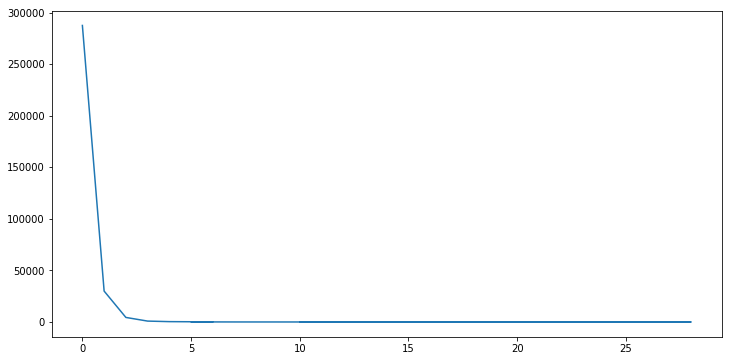

In [21]:
import matplotlib.pyplot as plt

raw_data['q1_6b_oov_count'].value_counts().plot(figsize=(12, 6))

In [23]:
raw_data['q1_6b_oov_count'].describe()

count    323480.000000
mean     0.135712     
std      0.440101     
min      0.000000     
25%      0.000000     
50%      0.000000     
75%      0.000000     
max      28.000000    
Name: q1_6b_oov_count, dtype: float64

In [36]:
raw_data['q1_6b_oov_count'].quantile(0.9)

1.0

In [34]:
w2v.loc['amazon']

1     0.568190
2    -0.956090
3     0.512090
4     1.209900
5    -0.419320
6    -0.959270
7    -1.639500
8    -0.541070
9     1.992700
10    0.523760
11    0.431340
12    0.131920
13    0.835920
14   -0.922560
15    0.470820
16   -0.171080
17   -0.288480
18   -0.331120
19    0.177420
20   -0.284830
21   -0.663460
22   -0.215740
23   -0.003821
24    0.580600
25    0.520530
26   -0.295940
27   -0.598030
28   -0.020501
29    0.000020
30   -0.408890
31    1.700900
32   -0.721810
33   -0.125830
34    0.645270
35   -0.326460
36   -0.513850
37   -1.221200
38   -0.928320
39   -0.025463
40   -0.551190
41    0.381690
42    0.384070
43    0.151210
44   -0.249310
45   -0.748340
46    0.155950
47    0.272730
48   -0.163560
49    0.059135
50   -0.764260
Name: amazon, dtype: float64

In [5]:
embed_mat = np.load('../data/vocab/glove.6B.vocab.embed_mat.npy')

In [9]:
embed_mat

array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.418   ,  0.24968 , -0.41242 , ..., -0.18411 , -0.11514 ,
        -0.78581 ],
       ...,
       [-0.51181 ,  0.058706,  1.0913  , ..., -0.25003 , -1.125   ,
         1.5863  ],
       [-0.75898 , -0.47426 ,  0.4737  , ...,  0.78954 , -0.014116,
         0.6448  ],
       [ 0.072617, -0.51393 ,  0.4728  , ..., -0.18907 , -0.59021 ,
         0.55559 ]])

In [6]:
vocab = pd.read_table('../data/vocab/glove.6B.vocab')

In [12]:
vocab.set_index('index').iloc[-1]

word    sandberger
Name: 399999, dtype: object